In [1]:
# General imports
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data Science
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from analysis_utils import *
from plotting_utils import *

In [2]:
data = load_results()

## Best result

In [3]:
accepted_results = data["grouped"][data["grouped"]["recall"] == data["grouped"]["recall"].max()]
accepted_results[accepted_results["precision"] == accepted_results["precision"].max()]

,nlp,algorithm,cost_ratio,precision,recall
24,Bigrams,Naive Bayes,10,0.450256,1


## Best results

In [4]:
accepted_results[accepted_results["precision"] > 0.4].sort(["precision"], ascending=False)

,nlp,algorithm,cost_ratio,precision,recall
24,Bigrams,Naive Bayes,10,0.450256,1
75,Combination,Naive Bayes,25,0.444199,1
125,None,Naive Bayes,25,0.441965,1
18,Bigrams,Logistic,1000,0.439503,1
76,Combination,Naive Bayes,50,0.426551,1
25,Bigrams,Naive Bayes,25,0.416640,1
126,None,Naive Bayes,50,0.413989,1
77,Combination,Naive Bayes,100,0.407712,1
26,Bigrams,Naive Bayes,50,0.404563,1
176,Stemming,Naive Bayes,50,0.401889,1


## Best Result by Algorithm

In [5]:
get_best(data, "Naive Bayes")

,nlp,algorithm,cost_ratio,precision,recall
24,Bigrams,Naive Bayes,10,0.450256,1


In [6]:
get_best(data, "SVM")

,nlp,algorithm,cost_ratio,precision,recall
44,Bigrams,SVM,10,0.476494,0.996601


In [7]:
get_best(data, "Random Forest")

,nlp,algorithm,cost_ratio,precision,recall
39,Bigrams,Random Forest,1000000,0.726834,0.941569


In [8]:
get_best(data, "Logistic")

,nlp,algorithm,cost_ratio,precision,recall
18,Bigrams,Logistic,1000,0.439503,1


## Analyzing preprocessing techniques

### Steming vs bigrams vs combination

In [9]:
are_different(data, 'nlp', 'precision')
print("=" * 30)
are_different(data, 'nlp', 'recall')

None 0.613094528
Stemming 0.61239023
Bigrams 0.585660922
Combination 0.600275024

NON Parametric test

Statistically NON-significant different results between None and Stemming
Statistically significant different results between None and Bigrams
Statistically NON-significant different results between None and Combination
Statistically NON-significant different results between Stemming and Bigrams
Statistically NON-significant different results between Stemming and Combination
Statistically NON-significant different results between Bigrams and Combination
None 0.952829404
Stemming 0.951656892
Bigrams 0.947428734
Combination 0.95213788

NON Parametric test

Statistically NON-significant different results between None and Stemming
Statistically NON-significant different results between None and Bigrams
Statistically NON-significant different results between None and Combination
Statistically NON-significant different results between Stemming and Bigrams
Statistically NON-significant diffe

## Analyzing algorithms

In [10]:
are_different(data, 'algorithm', 'precision', threshold=0.001)
print("=" * 30)
are_different(data, 'algorithm', 'recall',threshold=0.001)

Naive Bayes 0.4832357175
Random Forest 0.8460042275
SVM 0.6586887275
Baseline 0.344986
Logistic 0.6813612075

NON Parametric test

Statistically significant different results between Naive Bayes and Random Forest
Statistically significant different results between Naive Bayes and SVM
Statistically significant different results between Naive Bayes and Baseline
Statistically significant different results between Naive Bayes and Logistic
Statistically significant different results between Random Forest and SVM
Statistically significant different results between Random Forest and Baseline
Statistically significant different results between Random Forest and Logistic
Statistically significant different results between SVM and Baseline
Statistically NON-significant different results between SVM and Logistic
Statistically significant different results between Baseline and Logistic
Naive Bayes 0.991554715
Random Forest 0.88819116
SVM 0.926818655
Baseline 1.0
Logistic 0.9485016075

NON Parametr

### List best configurations

In [4]:
list_best_configurations(data)

[array(['None', 'Naive Bayes', 25, 0.4419649183750153, 1.0], dtype=object),
 array(['Stemming', 'Naive Bayes', 50, 0.4018888622522354, 1.0], dtype=object),
 array(['Bigrams', 'Naive Bayes', 10, 0.45025616586208345, 1.0], dtype=object),
 array(['Combination', 'Naive Bayes', 25, 0.4441989749670029, 1.0], dtype=object),
 array(['None', 'Random Forest', 1000000, 0.7670512557029724,
        0.9170588195323944], dtype=object),
 array(['Stemming', 'Random Forest', 1000000, 0.7848034262657165,
        0.9137254774570465], dtype=object),
 array(['Bigrams', 'Random Forest', 1000000, 0.7268341183662415,
        0.9415686190128326], dtype=object),
 array(['Combination', 'Random Forest', 25, 0.7900914371013641,
        0.9350326836109162], dtype=object),
 array(['None', 'SVM', 10, 0.6093205630779266, 0.9886928021907806], dtype=object),
 array(['Stemming', 'SVM', 25, 0.5619763672351837, 0.9835620880126953], dtype=object),
 array(['Bigrams', 'SVM', 10, 0.4764940828084946, 0.9966012954711914], dtype=o

In [3]:
recalls = []
precisions = []
for m in ["Naive Bayes", "Random Forest", "SVM", "Baseline"]:
    recalls.append(get_best_by_cost(data, "recall", m , "recall"))
    precisions.append(get_best_by_cost(data, "recall", m , "precision"))

NameError: name 'get_best_by_cost' is not defined

In [7]:
plot_image(axis_costs, recalls, title="RECALL", ylim = [0.70, 1.005], 
           xlim = cxlim, file_name="recall", labels=labels, ylabel="Recall (%)", 
           loc='lower righ', markers="<Do|")

NameError: name 'recalls' is not defined

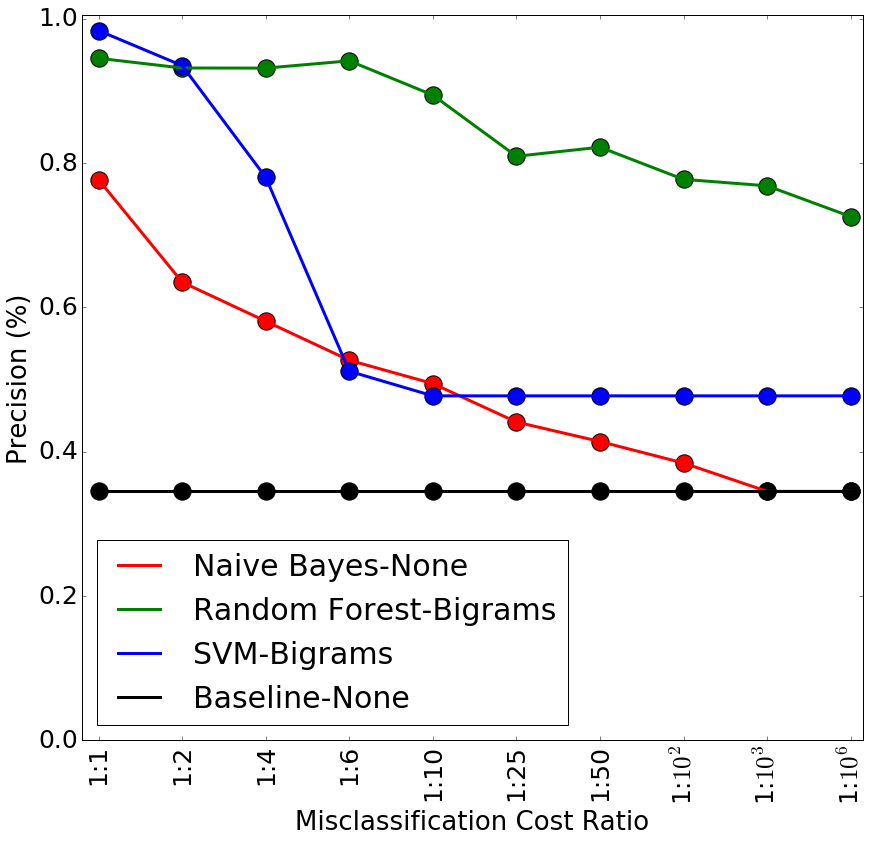

In [13]:
plot_image(axis_costs, precisions, title="RECALL", ylim = [0., 1.005], 
           xlim = cxlim, file_name="precision", labels=labels, ylabel="Precision (%)", 
           loc='lower righ', markers="<Do|")

In [7]:
data["grouped"].loc[data["grouped"]["algorithm"] == "SVM"]

,nlp,algorithm,cost_ratio,precision,recall
40,Bigrams,SVM,2,0.986608,0.487647
41,Bigrams,SVM,3,0.939657,0.773072
42,Bigrams,SVM,4,0.776234,0.971078
43,Bigrams,SVM,6,0.509060,0.994902
44,Bigrams,SVM,10,0.476494,0.996601
45,Bigrams,SVM,25,0.475394,0.996601
46,Bigrams,SVM,50,0.475394,0.996601
47,Bigrams,SVM,100,0.475394,0.996601
48,Bigrams,SVM,1000,0.475394,0.996601
49,Bigrams,SVM,1000000,0.475394,0.996601
